#### AUTHOR: VAISHNAV KRISHNA P

## OPTIMIZING SCALABLE DATA-DRIVEN RECOMMENDATIONS WITH EVOLUTIONARY ALGORITHM FOR PREDICTIVE ANALYTICS
#### TASK 
* In this project, we focus on **Optimizing Scalable Data-Driven Recommendations with Evolutionary Algorithms for Predictive Analytics**.The task involves **training a model and optimizing its parameters through Evolutionary Algorithms,** with a particular emphasis on Genetic Algorithms. These algorithms enhance the performance of predictive models by optimizing key parameters, such as the **regularization parameter (C) in Logistic Regression, which helps balance model complexity and performance. This approach aims to improve the accuracy, scalability, and efficiency of data-driven recommendations.**

### ML WORKFLOW 

1. **DATA COLLECTION**
    - Collecting relevant data 

2. **EXPLORATORY DATA ANALYSIS (EDA)**
    - 2.1 FEATURE ANALYSIS
        - Understanding the significance and characteristics of individual features.
    - 2.2 MISSING VALUE ANALYSIS
        - Identifying and handling missing data.
    - 2.3 NUMERICAL & CATEGORICAL FEATURE ANALYSIS
        - Distinguishing between numerical and categorical data and analyzing their distributions.
    - 2.4 CORRELATION ANALYSIS
        - Evaluating the relationships between features to detect multicollinearity.
    - 2.5 OUTLIER ANALYSIS
        - Detecting and managing anomalies or outliers in the data.
    - 2.6 DATA VISUALIZATION
        - Visualizing patterns and trends using charts and graphs.
    - 2.7 OBSERVATIONS
        - Summarizing key insights derived from the analysis.

3. **DATA PREPROCESSING**
    - 3.1 DATA CLEANING
        - Removing inconsistencies, duplicates, and handling noisy data.
    - 3.2 DATA REDUCTION
        - Reducing dimensionality or aggregating features to simplify the dataset.
    - 3.3 DATA TRANSFORMATION
        - Scaling, normalizing, encoding, or converting data into a format suitable for the model.

4. **MODEL TRAINING & COMPARISON**
    - 4.1 TRAINING USING LOGISTIC REGRESSION
        - Training a baseline model using logistic regression.
    - 4.2 TRAINING USING SUPPORT VECTOR MACHINE (SVM)
        - Implementing SVM for classification.
    - 4.3 TRAINING USING NAIVE BAYES
        - Utilizing probabilistic learning based on Bayes’ theorem.
    - 4.4 TRAINING USING DECISION TREE
        - Building a tree-based model for interpretability.
    - 4.5 TRAINING USING RANDOM FOREST
        - Training an ensemble model for improved accuracy.

5. **MODEL EVALUATION**
    - 5.1 ACCURACY SCORE
        - Measuring the proportion of correctly classified instances.
    - 5.2 CONFUSION MATRIX
        - Analyzing true positives, true negatives, false positives, and false negatives.
    - 5.3 CLASSIFICATION REPORT
        - Reviewing precision, recall, F1-score, and support for each class.

6. **HYPERPARAMETER TUNING**
    - 6.1 OPTIMIZATION OF HYPERPARAMETERS
        - Fine-tuning parameters like regularization (C in Logistic Regression) to enhance performance using Evolutionary Algorithms(EA).

7. **DEPLOYMENT**
    - Deploying the trained model to production, integrating it with APIs or user interfaces for real-world usage.


In [245]:
# importing the necessory dependencies 
import pickle
import random 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
%matplotlib inline 
# ignoring the unnecessory warnings 
import warnings 
warnings.filterwarnings(action='ignore')
# setting the print options 
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

### DATA COLLECTION: 
* data is imported from the built-in dataset in scikit-learn for breast cancer detection.

In [246]:
# importing the dataset for the analysis 
data = load_breast_cancer()

In [247]:
# converting the dataset as dataframe 
df = pd.DataFrame(data.data, columns=data.feature_names)
# adding the target feature also 
df['target'] = data.target

In [248]:
# first five data's
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [249]:
# shape of the dataframe 
df.shape

(569, 31)

In [250]:
# checking the datatypes and all informations of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### EDA(EXPLORATIVE DATA ANALYTICS)

#### FEATURE ANALYSIS

- 1. mean radius: Average distance from the center to points on the perimeter of the tumor.
- 2. mean texture: Standard deviation of grayscale values within the image.
- 3. mean perimeter: Average length of the tumor’s boundary.
- 4. mean area: Average area of the tumor.
- 5. mean smoothness: Measure of smoothness of the tumor's boundary.
- 6. mean compactness: The compactness of the tumor, calculated as (perimeter^2 / area) - 1.
- 7. mean concavity: Degree of concave portions of the tumor's boundary.
- 8. mean concave points: Number of concave points along the boundary.
- 9. mean symmetry: Measure of symmetry of the tumor.
- 10. mean fractal dimension: A measure of the tumor's complexity.

- 11. radius error: Standard error of the radius.
- 12. texture error: Standard error of the texture.
- 13. perimeter error: Standard error of the perimeter.
- 14. area error: Standard error of the area.
- 15. smoothness error: Standard error of the smoothness.
- 16. compactness error: Standard error of the compactness.
- 17. concavity error: Standard error of the concavity.
- 18. concave points error: Standard error of the concave points.
- 19. symmetry error: Standard error of the symmetry.
- 20. fractal dimension error: Standard error of the fractal dimension.

- 21. worst radius: Maximum radius value observed.
- 22. worst texture: Maximum texture value observed.
- 23. worst perimeter: Maximum perimeter value observed.
- 24. worst area: Maximum area value observed.
- 25. worst smoothness: Maximum smoothness value observed.
- 26. worst compactness: Maximum compactness value observed.
- 27. worst concavity: Maximum concavity value observed.
- 28. worst concave points: Maximum concave points observed.
- 29. worst symmetry: Maximum symmetry value observed.
- 30. worst fractal dimension: Maximum fractal dimension observed.

* Target variable 'class' represents the diagnosis:
- 0: Malignant tumor
- 1: Benign tumor

#### MISSING VALUE ANALYSIS 

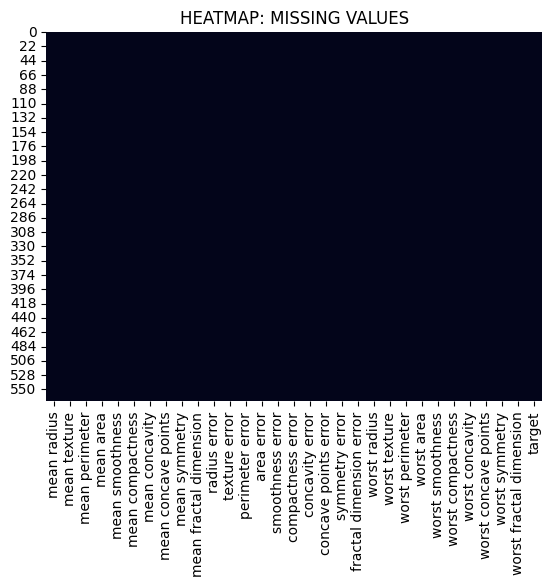

In [251]:
# heat map for visualising the number of missing values 
plt.title("HEATMAP: MISSING VALUES")
sns.heatmap(df.isna(), annot=False, cbar=False)
plt.show()

#### NUMERICAL FEATURES & CATEGORICAL FEATURE ANALYSIS

In [252]:
# numerical features 
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O' and feature != 'target']

In [253]:
len(numerical_features)

30

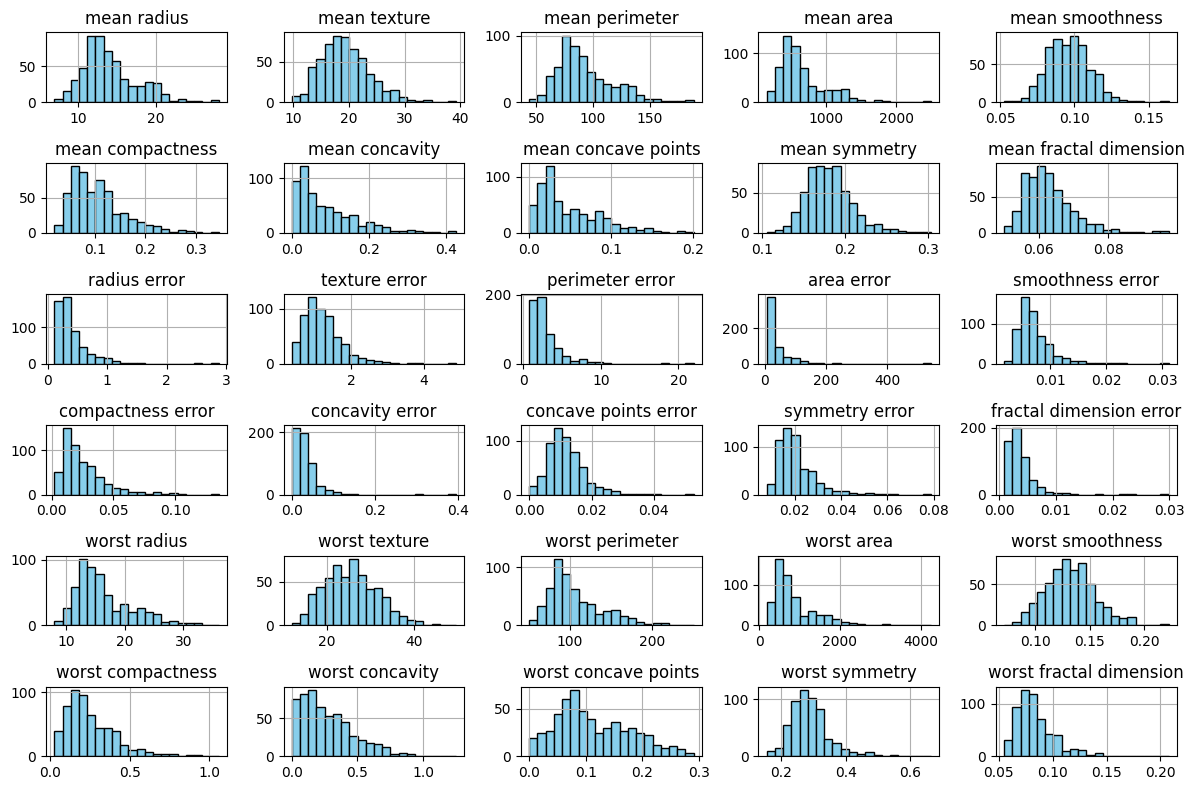

In [254]:
# Histogram for Distribution of Features
df[numerical_features].hist(bins=20, color='skyblue', edgecolor='black', figsize=(12, 8))
plt.tight_layout()
plt.show()

#### CORELATION ANALYSIS 

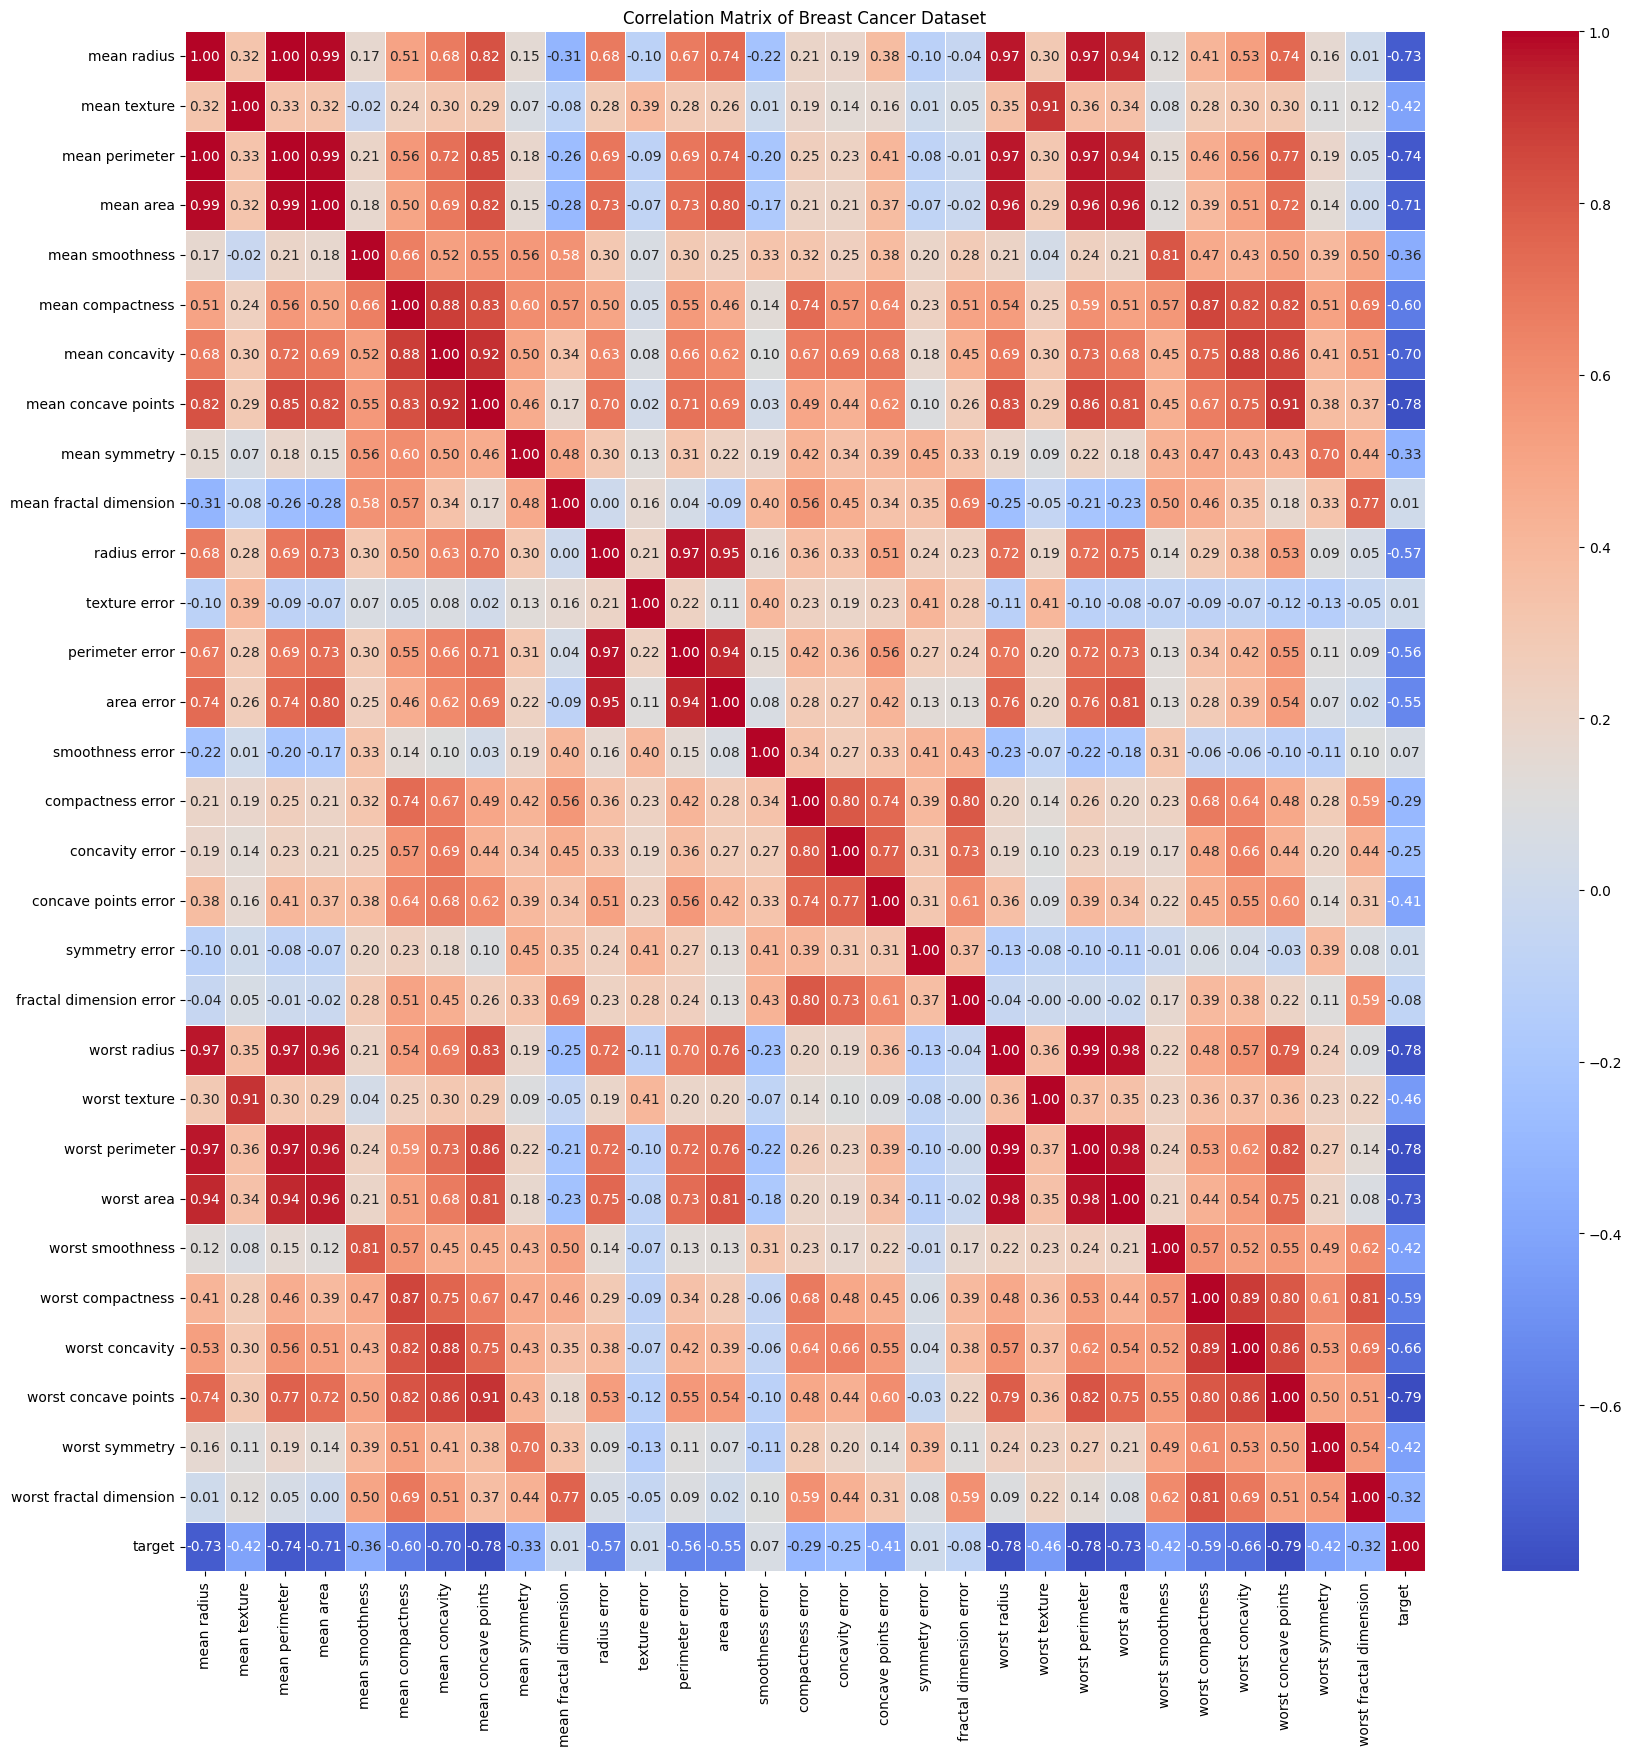

In [255]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Breast Cancer Dataset')
plt.show()

#### OUTLIER ANALYSIS 

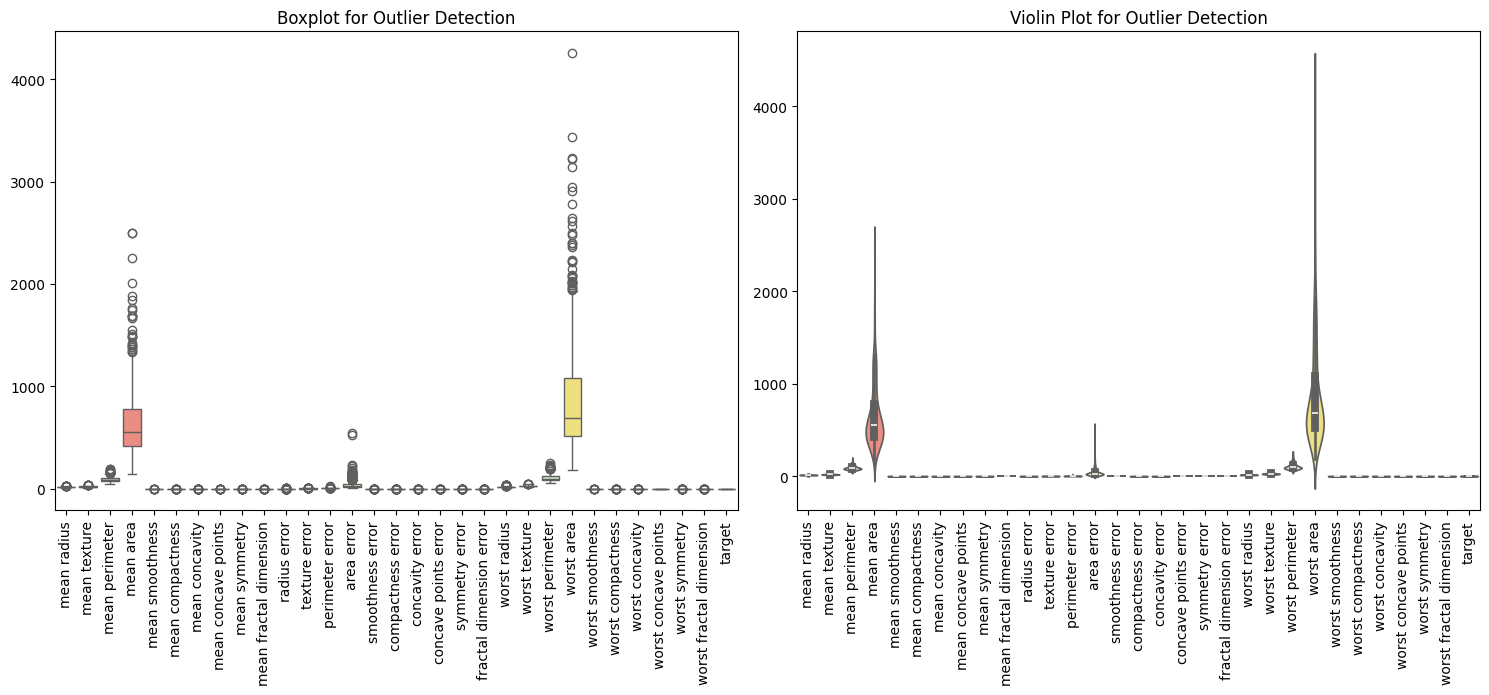

In [256]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Boxplot for outlier detection 
plt.subplot(2, 2, 1)
sns.boxplot(data=df, palette='Set3')
plt.title('Boxplot for Outlier Detection')
plt.xticks(rotation=90)

# Violin plot for outlier detection
plt.subplot(2, 2, 2)
sns.violinplot(data=df, palette='Set3')
plt.title('Violin Plot for Outlier Detection')
plt.xticks(rotation=90)

# Adjust layout 
plt.tight_layout()
plt.show()

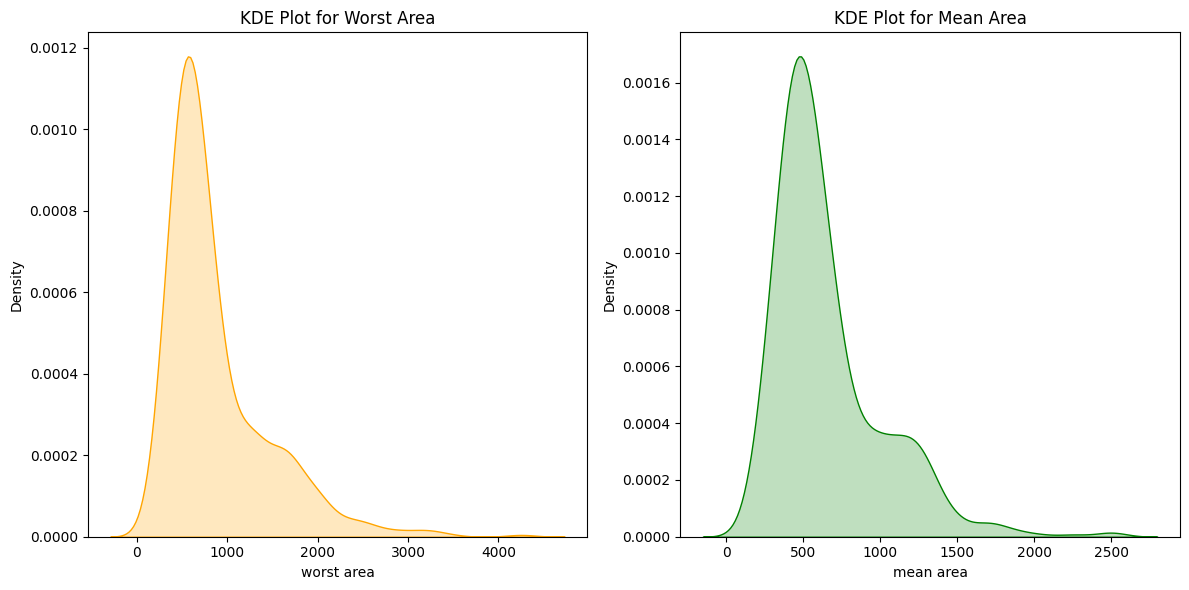

In [257]:
# figure size
plt.figure(figsize=(12, 6))


# Kernel Density Plot
plt.subplot(1, 2, 1)  
sns.kdeplot(df['worst area'], shade=True, color='orange')
plt.title('KDE Plot for Worst Area')

plt.subplot(1, 2, 2)
sns.kdeplot(df['mean area'], shade=True, color='green')
plt.title('KDE Plot for Mean Area')

# Adjust layout to prevent overlap and display the figure
plt.tight_layout()
plt.show()

#### OBSERVATION
* **1. No Missing Values:** The dataset does not contain any missing values in any of the features.
* **2. All Features Are Numerical:** Every feature in the dataset is numerical, with no categorical variables present.
* **3. Many Features Are Right Skewed:** Several features exhibit right skewness in their distribution,
* **4. Some Features Have Low Correlation:** A number of features show weak correlations with each other,suggesting that they do not share much linear relationship.
* **5. Outliers in Mean Area and Worst Area:** The features 'mean area' and 'worst area' contain a significant number of outliers,

### DATA PREPROCESSING

#### DATA CLEANING

* No need to handle the missing values.since there is no missing values.

#### DATA REDUCTION

In [258]:
# extracting features which is less corelated with the target features 
less_corelated_features = [feature for feature in df.columns if abs(df[feature].corr(df['target'])) < 0.4]

In [259]:
# List of less corelated features 
less_corelated_features

['mean smoothness',
 'mean symmetry',
 'mean fractal dimension',
 'texture error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'symmetry error',
 'fractal dimension error',
 'worst fractal dimension']

In [260]:
# Removing the less corelated features
df.drop(columns=less_corelated_features, inplace=True)

#### DATA TRANSFORMATION

In [261]:
# Dataset parameters 
X = df.drop(columns = ['target'])
y = df['target']

In [262]:
# Creating a scaler object 
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### MODEL COMPARISON

In [263]:
# Dataset splitting 
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [264]:
# checking the splits are correct 
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((398, 20), (171, 20), (398,), (171,))

In [265]:
# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, C = 1),
    "Support Vector Machine (SVM)": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate each classifier
accuracy_scores = {}
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    # Make predictions
    y_pred = clf.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Store the accuracy
    accuracy_scores[name] = accuracy

# Print the accuracy scores
print("Accuracy Scores for Different Algorithms:")
for name, accuracy in accuracy_scores.items():
    print(f"{name}: {accuracy:.4f}")

Accuracy Scores for Different Algorithms:
Logistic Regression: 0.9883
Support Vector Machine (SVM): 0.9766
Naive Bayes: 0.9357
Decision Tree: 0.9474
Random Forest: 0.9649


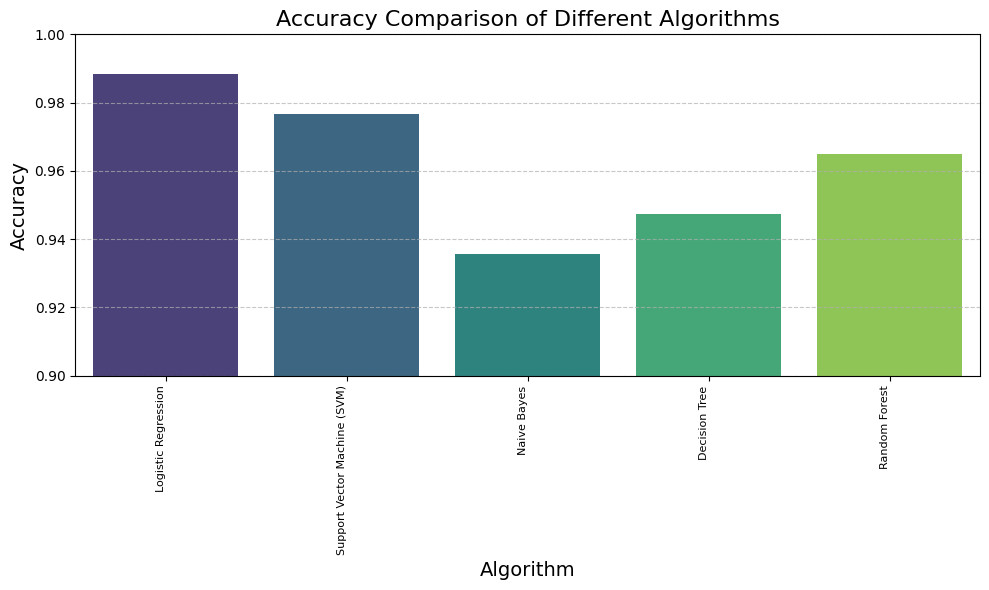

In [266]:
# Visualize the accuracy scores
plt.figure(figsize=(10, 6))

sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.title("Accuracy Comparison of Different Algorithms", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Algorithm", fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.ylim(0.9, 1)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

### MODEL TRANING 

In [267]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

### MODEL EVALUATION

Model Accuracy: 0.9883

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        63
           1       0.98      1.00      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



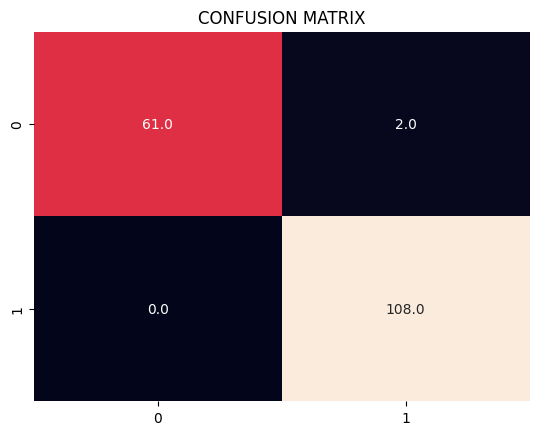

In [268]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(class_report)
plt.title("CONFUSION MATRIX")
sns.heatmap(conf_matrix, annot=True, cbar=False, fmt='0.1f')
plt.show()

In [269]:
# Save the model and scaler using pickle
with open('logistic_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler have been successfully saved!")

Model and scaler have been successfully saved!


## EVOLUTIONARY ALGORITHM (EA)
**Evolutionary Algorithms (EAs) are a family of optimization algorithms inspired by Darwin's theory of evolution and natural selection. They are heuristic search algorithms used to find approximate solutions to complex optimization and search problems.**
* Types of Evolutionary Algorithm includes,
1. Genetic Algorithms (GA)
2. Genetic Programming (GP)
3. Evolution Strategies (ES)
4. Differential Evolution (DE)

### GENETIC ALGORITHM(GA)
- Genetic algorithms are **heuristic search algorithm** that is inspired from **charles darwin's theory of natural selection.**
- **This algorithm reflects the process of natural selection where the fittest individuals are selected for the reproduction in order to produce offspring of the next generation**
- Genetic algorithms are used in various applications such as **image processing, Designing electronic circuits**

### GA(GENETIC ALGORITHM WORKFLOW)
#### ALGORITHM
- STEP1 **INITIALIZE**
- STEP2 **FITNESS ASSAIGNMENT**
- STEP3 **SELECTION**
- STEP4 **CROSS OVER/REPRODUCTION**
- STEP5 **TERMINATION**

![GA WORKFLOW IMAGE](image.png)

#### STEP1 INITIALISATION
This process begins with a **group of individuals, collectively referred to as the population.** Each individual in the population represents a potential solution to the problem at hand. **Every individual is characterized by a set of parameters known as genes**, which define the solution's properties. These **genes are combined to form a sequence, commonly called a chromosome**, which serves as the representation of the solution.

In [270]:
# Initialize population (C values for Logistic Regression): with random values 
population_size=10

population = [random.uniform(0.01, 100) for _ in range(population_size)]

In [271]:
# printing the population
population

[53.99803800577767,
 15.11930302651095,
 70.19319195721951,
 52.50309469590022,
 16.10842252113256,
 56.14399173447401,
 94.39935035831974,
 85.23046776353928,
 98.38971432925965,
 11.388704304518212]

#### STEP2 FITNESS ASSAIGNMENT
The fitness function **evaluates how fit each individual is, determining their ability to compete with others.** Based on their fitness scores, **two individuals are selected to become parents**. Individuals with higher fitness scores have a greater chance of being chosen as parents.

In [272]:
# Train the Logistic Regression model
def train_model(X_train, y_train, C):
    # Create and train the Logistic Regression model with hyperparameter C
    model = LogisticRegression(C=C, max_iter=10000)
    model.fit(X_train, y_train)
    return model

fitness_scores = []
for C in population:
    model = train_model(X_train, y_train, C)
    accuracy = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()  # Cross-validation
    fitness_scores.append(accuracy)

In [273]:
# Fitness scores 
i = 0

for fitness in fitness_scores:
    i += 1
    print(f"Population {i} - Fitness score {np.round(fitness,4)}")

Population 1 - Fitness score 0.9648
Population 2 - Fitness score 0.9698
Population 3 - Fitness score 0.9673
Population 4 - Fitness score 0.9648
Population 5 - Fitness score 0.9698
Population 6 - Fitness score 0.9648
Population 7 - Fitness score 0.9648
Population 8 - Fitness score 0.9648
Population 9 - Fitness score 0.9648
Population 10 - Fitness score 0.9723


#### STEP3 SELECTION
Selection is the **process of choosing individuals from the current population to create the next generation.** The goal is to **select individuals with higher fitness scores, as they are more likely to produce better solutions. **

There are several methods of selection:
- **Roulette Wheel Selection:** In this method, each individual is assigned a slice of a "roulette wheel" proportional to its fitness score. The larger the fitness score, the larger the slice. Individuals are then selected by spinning the wheel, with higher-fitness individuals having a higher probability of being chosen.

- **Tournament Selection:** In tournament selection, a set number of individuals are randomly chosen, and the one with the highest fitness score within that group is selected as a parent. This process is repeated for the required number of parents.

- **Rank-Based Selection:** This method sorts the individuals based on their fitness scores and assigns a rank to each individual. Selection is then based on these ranks rather than the raw fitness scores. Individuals with higher ranks have a higher chance of being selected for the next generation. This helps prevent selection bias toward highly fit individuals when fitness values are too close.

In [274]:
# Find the best individual in the population: based on rank based selection
best_index = np.argmax(fitness_scores)
best_accuracy = fitness_scores[best_index]
best_solution = population[best_index]

In [275]:
# Best value of C(Regularisation parameter)
best_solution

11.388704304518212

In [276]:
# Selecting the best 5 population 
selected_population = [population[i] for i in np.argsort(fitness_scores)[-population_size//2:]]

In [277]:
selected_population

[98.38971432925965,
 70.19319195721951,
 15.11930302651095,
 16.10842252113256,
 11.388704304518212]

#### STEP4 CROSS OVER/REPRODUCTION
* **Crossover, or reproduction, is a significant phase in the Genetic Algorithm (GA).** 
- For each pair of parents selected to be mated, a **crossover point is randomly chosen within their genes.**
- Offspring are created by exchanging genetic material (genes) between the parents at the crossover point. These new offspring are then added to the population, contributing to the next generation.
##### Types of mutations 
1. **Flip Bit Mutation:** In this mutation, a bit in the individual's chromosome is randomly flipped from 0 to 1 or from 1 to 0. This is commonly used in binary encoded solutions.
2. **Gaussian Mutation:** This type of mutation involves adding random values sampled from a Gaussian distribution (normal distribution) to the genes. It is often used in continuous parameter spaces.
3. **Exchange/Swap Mutation:** In this mutation, two genes are randomly selected and swapped within an individual’s chromosome. This is used to change the order or arrangement of elements, often in problems like the traveling salesman problem.

In [278]:
# Cross over: simple cross over by finding the mean of it 
offspring = []
while len(offspring) < population_size - len(selected_population):
    parent1, parent2 = random.sample(selected_population, 2)
    child = (parent1 + parent2) / 2  # Simple crossover
    offspring.append(child)

In [279]:
# New offspring as a result of cross over 
offspring

[42.65624749186523,
 13.748563412825387,
 56.7545086778853,
 54.88920931688893,
 13.748563412825387]

In [280]:
# Mutation: Randomly mutate some offspring
mutation_rate = 0.01

for i in range(len(offspring)):
    if random.random() < mutation_rate:
        offspring[i] = offspring[i] * random.uniform(0.9, 1.1)  # Mutation

In [281]:
# Create the next generation
population = selected_population + offspring

### GENETIC ALGORITHM
It is formed by combining all the steps mentioned above.

In [286]:
def genetic_algorithm(X_train, y_train, X_test, y_test, generations=10, population_size=10, mutation_rate=0.1):
    
    # Initialize population (C values for Logistic Regression)
    population = [random.uniform(0.01, 10) for _ in range(population_size)] 
    best_solution = None
    best_accuracy = 0

    for gen in range(generations):
        print(f"\nGeneration {gen + 1} / {generations}")
        
        # Evaluate fitness (accuracy)
        fitness_scores = []
        for C in population:
            model = train_model(X_train, y_train, C)
            accuracy = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()  # Cross-validation
            fitness_scores.append(accuracy)

        # Find the best individual in the population
        best_index = np.argmax(fitness_scores)
        best_accuracy = fitness_scores[best_index]
        best_solution = population[best_index]
        
        print(f"Best accuracy in this generation: {best_accuracy * 100:.2f}% for C = {best_solution}")

        # Selection: Select the best half of the population
        selected_population = [population[i] for i in np.argsort(fitness_scores)[-population_size//2:]]

        # Crossover: Combine two selected individuals to create offspring
        offspring = []
        while len(offspring) < population_size - len(selected_population):
            parent1, parent2 = random.sample(selected_population, 2)
            child = (parent1 + parent2) / 2  # Simple crossover
            offspring.append(child)
            

        # Mutation: Randomly mutate some offspring
        for i in range(len(offspring)):
            if random.random() < mutation_rate:
                offspring[i] = offspring[i] * random.uniform(0.9, 1.1)  # Mutation

        # Create the next generation
        population = selected_population + offspring

    # Return the best solution found
    return best_solution, best_accuracy

### APPLY GENETIC ALGORITHM

In [292]:
# Apply Genetic Algorithm to find the best C value for Logistic Regression
best_C, best_accuracy = genetic_algorithm(X_train, y_train, X_test, y_test)

print(f"\nBest Hyperparameter C found: {best_C} with accuracy: {best_accuracy * 100:.2f}%")

# Train the Logistic Regression model with the best C found
final_model = train_model(X_train, y_train, best_C)


Generation 1 / 10
Best accuracy in this generation: 97.74% for C = 0.36918809523936746

Generation 2 / 10
Best accuracy in this generation: 97.74% for C = 0.36918809523936746

Generation 3 / 10
Best accuracy in this generation: 97.99% for C = 1.030675013756013

Generation 4 / 10
Best accuracy in this generation: 97.99% for C = 1.030675013756013

Generation 5 / 10
Best accuracy in this generation: 97.99% for C = 1.030675013756013

Generation 6 / 10
Best accuracy in this generation: 97.99% for C = 0.902436430836854

Generation 7 / 10
Best accuracy in this generation: 97.99% for C = 1.0863747338210166

Generation 8 / 10
Best accuracy in this generation: 97.99% for C = 0.9294841190340382

Generation 9 / 10
Best accuracy in this generation: 97.99% for C = 0.9343109194697161

Generation 10 / 10
Best accuracy in this generation: 97.99% for C = 0.9514085746208347

Best Hyperparameter C found: 0.9514085746208347 with accuracy: 97.99%


#### EVALUATING THE MODEL

In [293]:
# Evaluate the final model
y_pred = final_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy: 98.83%

Confusion Matrix:
[[ 61   2]
 [  0 108]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        63
           1       0.98      1.00      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



#### Resources used:
1. **Research Gate: Overview Evolutionary Algorithm: Thomas Batz-bielstein, Jurgen Branke, jorn Mehnen,Olaf Mernsmann**

2. **Wikipedia:** https://en.wikipedia.org/wiki/Genetic_algorithm 

3. **Greeks for Greeks**: https://www.geeksforgeeks.org/genetic-algorithms/